## Principios SOLID

Mantenibilidad: El software tiene que ser facil de mantener y modificar en el tiempo. El codigo tiene que estar bien organizado, tener una estructura clara y seguir buenas practicas.

Reusabilidad: Todos los componentes tienen que ser reutilizables. Todos tienen que ser independientes. Tienen que poder usarse en otros proyectos sin necesidad de codigo extra.

Legibilidad: facil y claro de entender, el nombre de las variables que tengan un significado, comentar cuando sea necesario.

Extensibilidad: El software debe permitir extenderse sin afectar a su comportamiento. 

----

1º SRP, Principio de responsabilidad única (Single responsability principle)

2º OCP, Principio de abierto/cerrado (Open/Closed principle)

3º LSP, Principio de sustitución de Liskov

4º ISP, Principio de segregación de interfaz

5º DIP, Principio de inversion de dependencias

## 14 - SRP (Single Responsibility Principle)

### Representación mental

El cuervo es una clase que tiene una unica funcionalidad, llevarte al Santuario de Enlace de Fuego, cumple el 1º principio SOLID. para ello tiene un metodo que es cogerte en un lugar especifico, otro que es volar y otro que es dejarte en el sitio correspondiente.

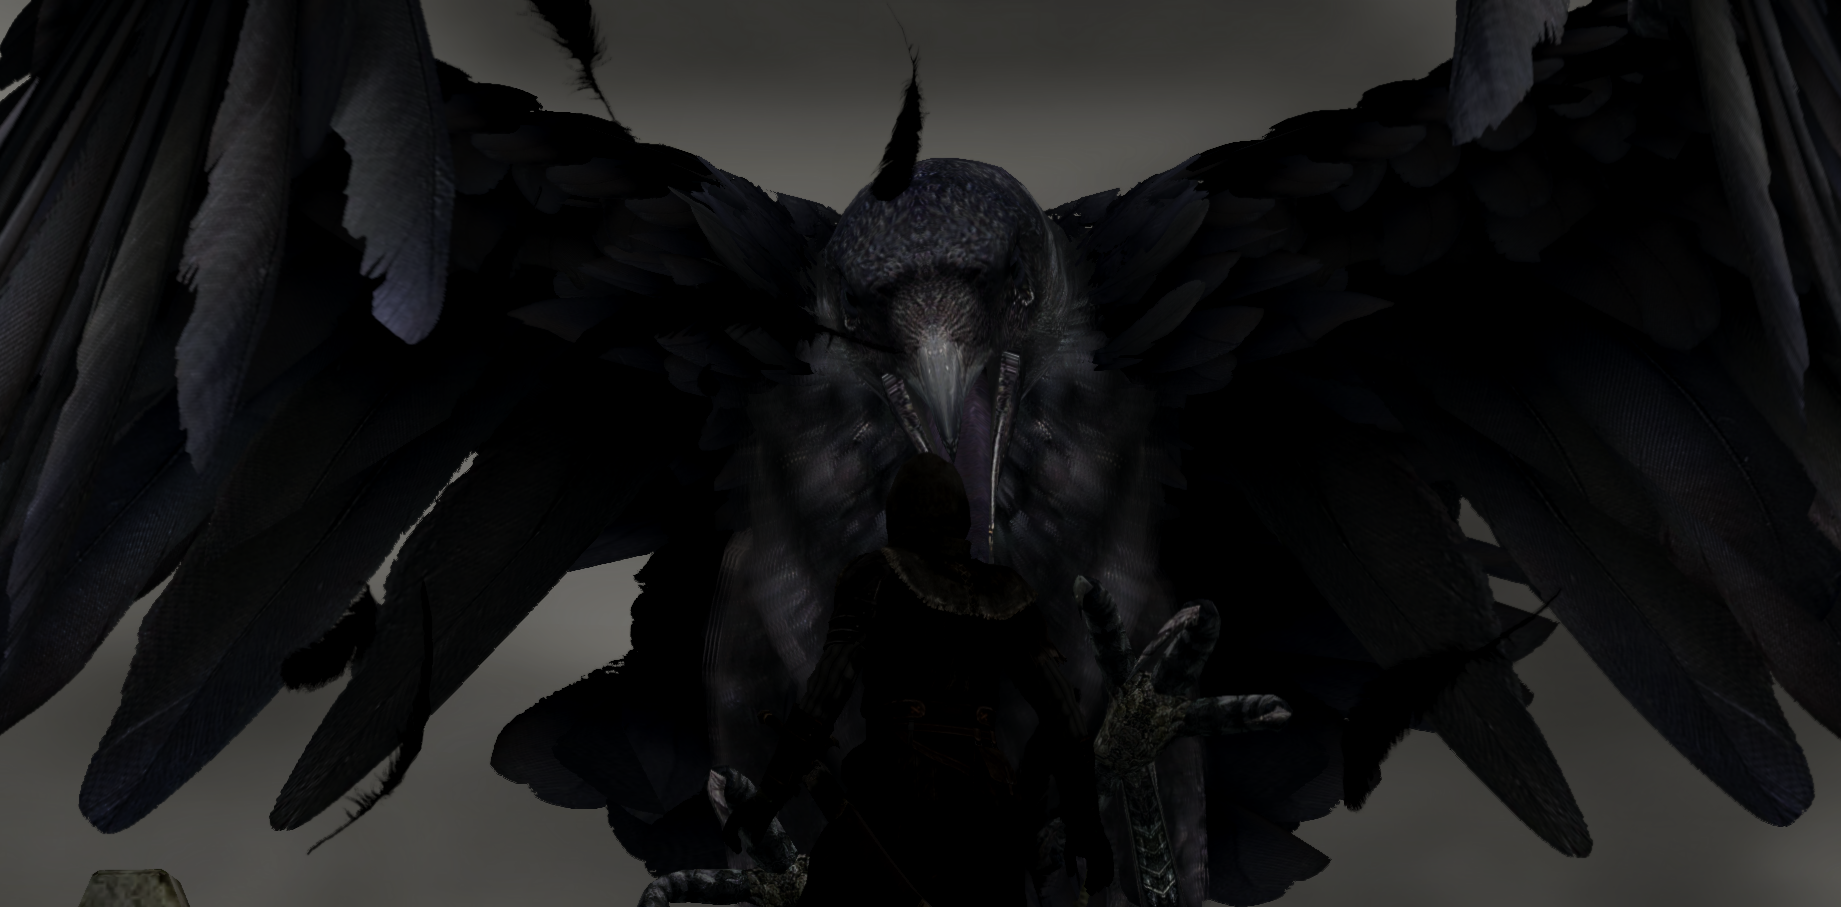

**[cuervo]** --> tiene una unica funcionalidad y unos pocos métodos para llevarla a cabo.

### Teoría

1º SRP, Principio de responsabilidad única (Single responsabilty principle)

Una clase tiene que tener una única razón para cambiar (cada clase debe tener una unica responsabilidad o tarea)

Este principio es para evitar clases sobrecargadas o multifunciones. Cuando las clases tienen una unica responsabilidad el codigo se vuelve más facil de mantener, más legible y más limpio.

Más importante, podamos saber que esa clase puede realizar su tarea sin depender de otras clases (es una manera de 
modularizar)

---

**[Quedan libres]**:

### Práctica

In [7]:
# Este codigo tiene un problema con el single responsability principle, porque la clase auto se esta 
# encargando tanto del movimiento del auto, como del combustible.

class Auto():
    def __init__(self):
        self.posicion = 0
        self.combustible = 100

    def mover(self,distancia):
        if self.combustible >= distancia / 2:  # cada 2 distancia gastamos 1 de combustible
            self.posicion += distancia
            self.combustible -= distancia/2
        else:
            print("No hay suficiente combustible")
    
    def agregar_combustible(self,cantidad):
        self.combustible += cantidad

    def obtener_combustible(self):
        return self.combustible

Para llevar a cabo de manera correcta ese principio, divimos las 2 funcionalidades en 2 clases

el tanque es el objeto que vamos a crear de la clase TanqueDeCombustible, que se encarga de su manejo y creamos un objeto  de tanque se lo pasamos como parametro al auto. Entonces para constuir el auto vamos a utilizar un objeto del tipo tanque que produce la otra clase.

EXPLICACION

Clase TanqueDeCombustible, tiene una propiedad estática (combustible = 100), cada vez que creamos un coche con ese tanque va a tener 100, después añadimos 3 métodos, un método para añadirle combustible, un método para retornarnos el combustible y otro método para usar el combustible.

Clase Auto, es una clase que nos pide un tanque (un objeto del tipo tanque de la clase tanque) y la posición se establece en 0 (self.posicion es un atributo estático y self.tanque = tanque es un atributo de instancia porque lo definimos en la instancia).

Después creamos un método que es para mover el auto, donde se hace una validación, se consume la mitad de la distancia recorrida. A la posicion se le suma la distancia (como un contador) y se usa el método de usar_combustible en caso de que se de la condición inicial. Y en caso de que no tengas más gasolina, te da un mensaje de que no hay suficiente combustible (no cambia combustible, ni posicion, porque no entra a esa parte del codigo).
Posteriormente un método de obtener_posicion para saber cuanto se movio.

Creamos 2 objetos, tanque y el auto, donde auto se le proporciona el objeto tanque.

In [8]:
class Auto():
    def __init__(self,tanque):
        self.posicion = 0
        self.tanque = tanque

    def mover(self,distancia):
        if self.tanque.obtener_combustible() >= distancia / 2:  # cada 2 distancia gastamos 1 de combustible
            self.posicion += distancia
            self.tanque.usar_combustible(distancia/2)
            print("Has movido el auto exitosamente")
        else:
            print("No hay suficiente combustible")

    def obtener_posicion(self):
        return self.posicion
    
class TanqueDeCombustible():
    def __init__(self):
        self.combustible = 100
    def agregar_combustible(self,cantidad):
        self.combustible += cantidad
    def obtener_combustible(self):
        return self.combustible
    def usar_combustible(self,cantidad):
        self.combustible -= cantidad

tanque = TanqueDeCombustible()
auto = Auto(tanque)

print(auto.obtener_posicion())
auto.mover(15)
print(auto.obtener_posicion())
auto.mover(20)
print(auto.obtener_posicion())
auto.mover(45)
print(auto.obtener_posicion())
auto.mover(70)
print(auto.obtener_posicion())
auto.mover(300)
print(auto.obtener_posicion())



0
Has movido el auto exitosamente
15
Has movido el auto exitosamente
35
Has movido el auto exitosamente
80
Has movido el auto exitosamente
150
No hay suficiente combustible
150


## 15 - OCP (Open/Closed Principle)

### Representación mental

En lugar de hacer una clase hoguera y hacerla más grande cada vez que surja algo nuevo en el juego, modificando la superclase Hoguera, llevamos a cabo varias subclases que me permiten un sistema abierto para agregar funcionalidades, pero cerrado a modificar la superclase.

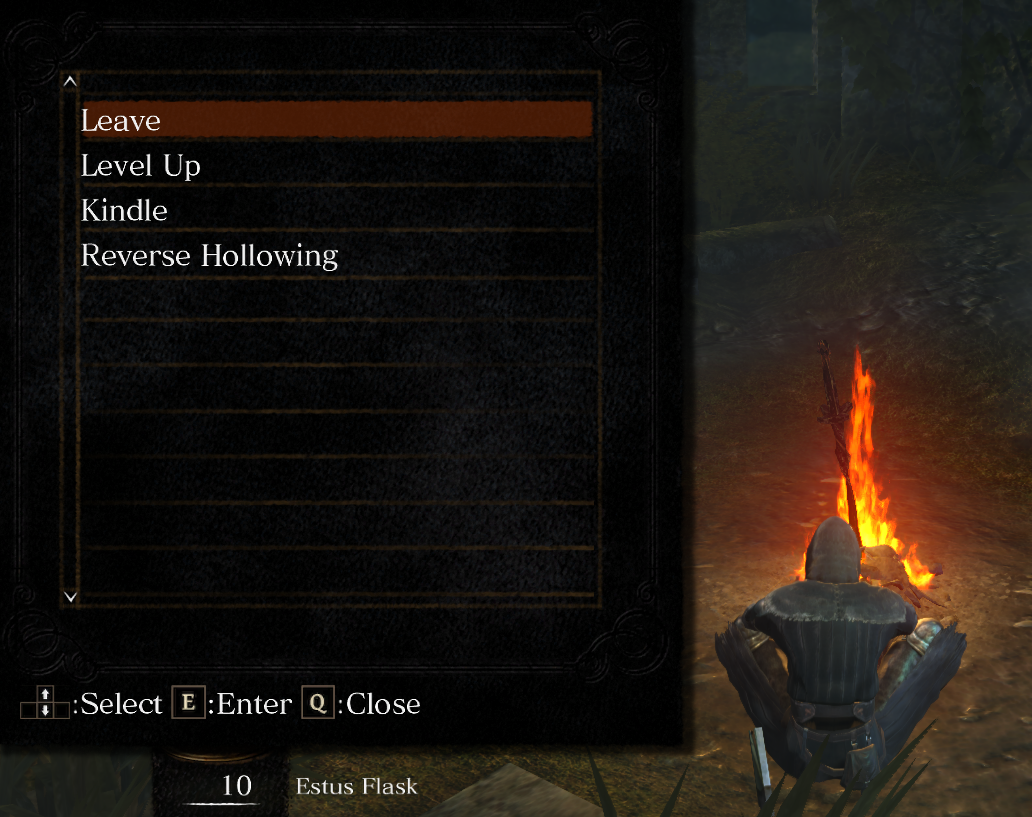

**[Hoguera]**  --> Como superclase de que heredan otras clases a medida que se extienden las funcionalidades, pero cerrada a modificarse.

### Teoría

Principio de abierto/cerrado (OCP - Open/Closed Principle): Las entidades de software (las clases, los modulos, las funciones, etc) tienen que estar abiertas para la extensión, pero cerradas para la modificacion. Deberiamos poder agregar nuevas funcionalidades sin modificar el codigo fuente de la clase o de las entidades.

En este ejemplo en lugar de hacer una sola clase y posteriormente andar modificandola. Llevas a cabo varias clases y si  por ejemplo en un futuro quieres notificar por whatsapp agregarias el atributo whatsapp a usuario y crearias una clase nueva (no modificarias la clase Notificador)

Esto no es para no tener muchos métodos, eso corresponde al primer principio (cada clase tiene que cumplir una única responsabilidad). Esto es para que si yo se que en un futuro voy a agregar funcionalidades a algo, tengo que dejar un sistema que este abierto para agregarle funciones, pero no para modificarlo.

De esta manera creamos un programa extensible, que esta abierto a añadir nuevas funcionalidades.

---

**[Quedan libres]**:


### Práctica

In [9]:
class Notificador():
    def __init__(self, user, message):
        self.user = user
        self.message = message

    # Clase padre que nos obligue al desarrollador , que tiene que crear la clase notificar, 
    # porque de lo contrario aparecera un error de que no se implemento.
        
    def notificar(self):
        raise NotImplementedError
    
class NotificadorEmail(Notificador):
    def notificar(self):
        print(f"Enviando MAIL a {self.user.email}")

class NotificadorSMS(Notificador):
    def notificar(self):
        print(f"Enviando SMS a {self.user.sms}")

In [10]:
class Notificador():
    def __init__(self, user, message):
        self.user = user
        self.message = message

    # Clase padre que nos obligue al desarrollador , que tiene que crear la clase notificar, 
    # porque de lo contrario aparecera un error de que no se implemento.
        
    def notificar(self):
        raise NotImplementedError
    
class NotificadorEmail(Notificador):
    def notificar(self):
        print(f"Enviando MAIL a {self.user.email}")

class NotificadorSMS(Notificador):
    def notificar(self):
        print(f"Enviando SMS a {self.user.sms}")

class NotificadorWhatsapp(Notificador):
    def notificar(self):
        print(f"Enviando Whatsapp a {self.user.whatsapp}")

## 16 - LSP (Liskov Substitution Principle)

### Representación mental

Se ve que te encuentras a mucha gente en hogueras, porque han ido a calentarse los pinguinos de Madagascar, se te hace raro que un pinguino pueda tener frio, pero son tan graciosos intentando montar un helicoptero con objetos random de la zona.

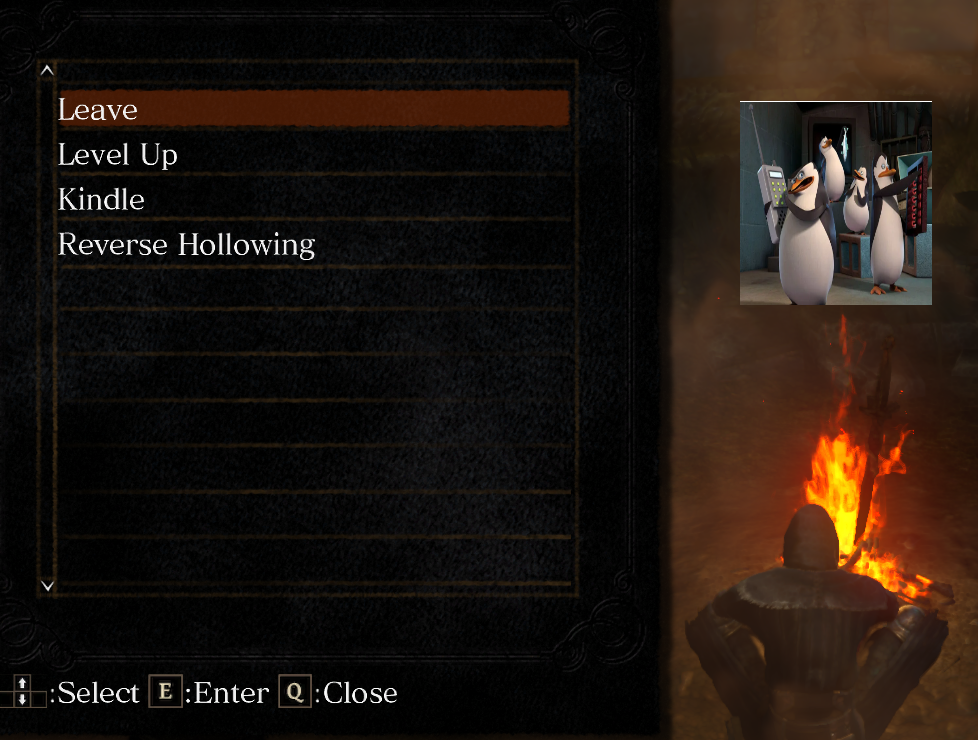

**[Pinguinos de Madagascar]**  

### Teoría

Es una especie de extensión del principio abierto/cerrado. Este principio establece que las clases derivadas tienen que ser sustituibles por sus clases bases.

Si la clase B es una subclase de la clase A, la clase A debería poder utilizarse en todos los lugares donde B pueda utilizarse.

---

**[Quedan libres]**:


### Práctica

In [13]:
#Aquí Pinguino hereda de Ave, pero un pinguino no puede hacer todo lo que hace un ave (que en este caso es volar).
# Para solucionar este problema, tendriamos que añadir el principio de sustitución de Liskov.
# Podriamos introducir una nueva clase y tener 2 subclases separadas que nos permitan recategorizar esto de otra manera.


class Ave():
    def volar(self):
        return "Estoy volando"
    
class Pinguino(Ave):
    def volar(self):
        return "No puedo volar"

# Eso es una variable de parametro que definimos ahi:
# dentro de esa función ave va a ser igual a esa clase.    
    
def hacer_volar(ave = Ave):
    return ave.volar()

print(hacer_volar(Ave()))
print(hacer_volar(Pinguino()))


Estoy volando
No puedo volar


In [16]:
# Estamos recategorizando, todo lo que tenga Ave, lo va a tener las AveVoladora y las AveNoVoladora. 
# De manera que en ave definimos todo aquello que todas las aves tengan en común y posteriormente en las subclases las apreciaciones.
# Esto cumple el 3º principio SOLID, donde las clases que hereden tienen que poder hacer todo lo que la base puede hacer.

class Ave():
    pass

class AveVoladora(Ave):
    def volar(self):
        return "Estoy volando"
    
class AveNoVoladora(Ave):
    pass

avenovoladora = AveNoVoladora()
avevoladora = AveVoladora()

avevoladora.volar()
# avenovoladora.volar()  -- > AttributeError: 'AveNoVoladora' object has no attribute 'volar'

'Estoy volando'

## 17 - ISP (Interface Segregation Principle)


### Representación mental

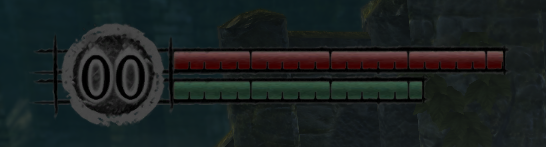

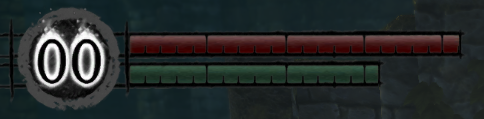

**[No muerto y humano avivar la llama]**  --> ambos son estados del personaje que pueden hacer comportamientos (metodos en común), pero el no muerto no puede avivar la llama.

### Teoría

ISP (Interface Segregation Principle)

Ningun cliente tiene que ser forzado a depender de interfaces que no utilice. Tenemos que eliminar las dependencias que no vamos a utilizar. 

Python no tiene una construcción de una interfaz como tal, en python tenemos de manera implicita como duck typing y el módulo typing.

En conclusión, si un objeto proporciona ciertos métodos con ciertos nombres entonces podemos tratarlo de interface.

---

**[Quedan libres]**:


### Práctica

In [2]:
# Funciona, pero esta mal, un no muerto no puede avivar la llama. Estoy llamando a un método en un objeto que no necesita ni puede hacerlo tampoco.

# Este caso rompe el principio interface segregation principle.

from abc import ABC, abstractmethod

class Personaje(ABC):
    
    @abstractmethod
    def andar(self):
        pass

    @abstractmethod
    def hablar(self):
        pass

    @abstractmethod
    def avivar_llama(self):
        pass

class Humano(Personaje):
    def andar(self):
        print("El humano esta andando")

    def hablar(self):
        print("El humano esta hablando")
    
    def avivar_llama(self):
        print("El humano esta avivando la llama")

class NoMuerto(Personaje):
    def andar(self):
        print("El No muerto esta andando")

    def hablar(self):
        print("El No muerto esta hablando")

humano = Humano()
# nomuerto = NoMuerto()
# TypeError: Can't instantiate abstract class NoMuerto without an implementation for abstract method 'avivar_llama'

In [8]:
# Para solucionar esto tenemos que dividir la interfaz en varias interfaces mas pequeñas.

from abc import ABC, abstractmethod

class Andador(ABC):
    @abstractmethod
    def andar(self):
        pass

class Hablador(ABC):
    @abstractmethod
    def hablar(self):
        pass

class AvivadorDeLlamas(ABC):
    @abstractmethod
    def avivar_llama(self):
        pass

# De esta manera, le indicamos que el Humano tiene que heredar de la clase Andador por lo que tiene que tener
# el metodo andar, hereda de Hablador por lo que tendrá el método hablar y hereda de AvivadorDeLlamas por lo
# que tendra el metodo avivar_llama.
    
class Humano(Andador, Hablador, AvivadorDeLlamas):
    def andar(self):
        print("El humano esta andando")

    def hablar(self):
        print("El humano esta hablando")
    
    def avivar_llama(self):
        print("El humano esta avivando la llama")

# NoMuerto hereda de la clase Andador, porque puede andar y Hablador, porque puede hablar, pero no puede avivar la llama.

class NoMuerto(Andador,Hablador):
    def andar(self):
        print("El No muerto esta andando")

    def hablar(self):
        print("El No muerto esta hablando")

humano = Humano()
nomuerto = NoMuerto()


humano.andar()
humano.hablar()
humano.avivar_llama()
nomuerto.andar()
nomuerto.hablar()
# nomuerto.avivar_llama()

El humano esta andando
El humano esta hablando
El humano esta avivando la llama
El No muerto esta andando
El No muerto esta hablando


AttributeError: 'NoMuerto' object has no attribute 'avivar_llama'

## 18 - DIP (Dependency Inversion Principle)

### Representación mental

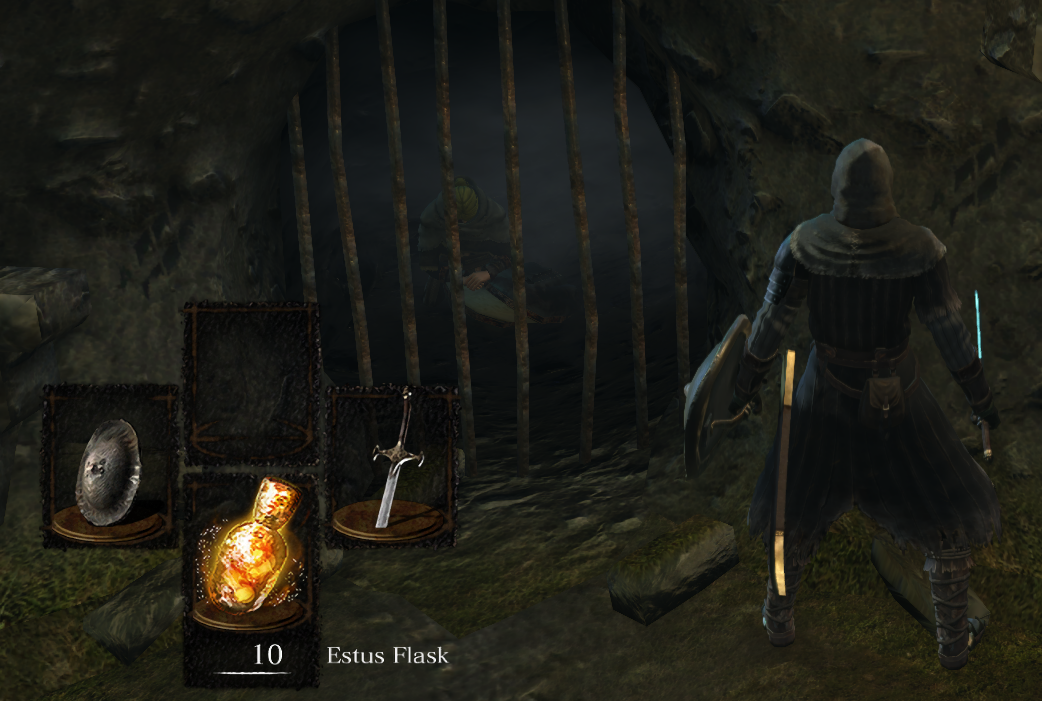

**[Señora que mejora los frascos]** --> pueden haber objetos que curen que sean diferentes y su implementación sea similar.

### Teoría

DIP - Dependency inversion principle (principio de inversión de dependencias)

Establece estos 2 elementos:

1º Los modulos de alto nivel no tienen que depender de los de bajo nivel, sino que los dos tienen que depender de las abstracciones.

2º Las abstracciones a su vez, no deben depender de los detalles, sino que los detalles dependen de las abstracciones.

Es decir, no tenemos que depender de implementaciones especificas, no tenemos que depender de una función en particular o de algun codigo que haga algo, sino que tenemos que depender de interfaces más complejas, más grandes.

Esto nos permite ser más flexibles, nos permite cambiar las implementaciones , facilita el testeo.

---

**[Quedan libres]**:

### Práctica

Abstracción de la curación: En lugar de que el personaje dependa directamente de una implementación específica del Estus Flask, como "Estus Flask +1", el personaje debería depender de una abstracción general de "healing item" (elemento de curación). Esto se puede lograr definiendo una interfaz HealingItem que incluya un método use() para curar al personaje.

Implementaciones concretas: Las diferentes versiones del Estus Flask (+1, +2, etc.) y otros elementos de curación en el juego pueden implementar la interfaz HealingItem. Cada implementación proporciona su propia lógica específica para el método use().

Cómo no se debe llevar a cabo:

Dependencia directa de la implementación concreta: Si el código del personaje depende directamente de la clase EstusFlask, por ejemplo, llamando a métodos específicos de esta clase como drink() o replenish(), se está violando el principio de inversión de dependencias. Esto hace que el código del personaje esté fuertemente acoplado a la implementación concreta del Estus Flask y dificulta la extensión y el mantenimiento del código.

Dependencia en otros elementos específicos: Además del Estus Flask, si el personaje depende directamente de otros elementos de curación específicos del juego (por ejemplo, hierbas curativas o pociones), también se está violando el principio de inversión de dependencias. Esto hace que el código sea menos flexible y más propenso a cambios en el futuro.

In [28]:
# Se define una abstracción HealingItem que tiene un método abstracto use().
# Se implementan dos clases concretas que representan diferentes elementos de curación: EstusFlask y HealingHerb. Ambas implementan el método use().
# La clase PlayerCharacter representa un personaje que puede usar elementos de curación. 
# Su constructor toma un objeto HealingItem como argumento, lo que permite que el personaje dependa de la abstracción en lugar de una implementación concreta.
# Al crear una instancia de PlayerCharacter, se le pasa un objeto EstusFlask. 
# Luego, el personaje puede usar este elemento de curación sin necesidad de conocer los detalles de su implementación.
# La clase PlayerCharacter es flexible y extensible. Se puede cambiar el elemento de curación que utiliza simplemente pasando una instancia diferente de HealingItem. 
# Esto demuestra cómo se cumple el principio de inversión de dependencias.


from abc import ABC, abstractmethod

# Abstracción de la curación
class HealingItem(ABC):
    @abstractmethod
    def use(self):
        pass

# Implementación concreta del Estus Flask
class EstusFlask(HealingItem):
    def use(self):
        print("Usando Estus Flask para curar al personaje")

# Implementación concreta del Estus Flask tras mejorarlo
class EstusFlaskMas1(HealingItem):
    def use(self):
        print("Usando Estus Flask +1 para curar al personaje")

# Otra implementación concreta de una hierba curativa
class HealingHerb(HealingItem):
    def use(self):
        print("Usando Healing Herb para curar al personaje")

# Clase del personaje que depende de la abstracción HealingItem
class PlayerCharacter:
    def __init__(self, healing_item):
        self.healing_item = healing_item

    def use_healing_item(self):
        self.healing_item.use()

# Creación de instancias de las implementaciones concretas
estus_flask = EstusFlask()
estus_flask_mas_1 = EstusFlaskMas1()
healing_herb = HealingHerb()

# Creación del personaje con dependencia de una abstracción
# El personaje usa el elemento de curación sin necesidad de conocer su implementación específica
player = PlayerCharacter(estus_flask)
player.use_healing_item()

# Cambio del elemento de curación utilizado por el personaje
player.healing_item = healing_herb
player.use_healing_item()

# Cambio del elemento de curación utilizado por el personaje
player.healing_item = estus_flask_mas_1
player.use_healing_item()


Usando Estus Flask para curar al personaje
Usando Healing Herb para curar al personaje
Usando Estus Flask +1 para curar al personaje
